___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon

from mpl_toolkits.mplot3d import Axes3D

In [2]:
sptdata = pd.read_csv("data.csv")
# #Young People Survey
# coludata = pd.read_csv("columns.csv")
# respdata = pd.read_csv("responses.csv")

Dicionário dos dados:
https://www.kaggle.com/nyartsgnaw/analyzing-gender-differences/data

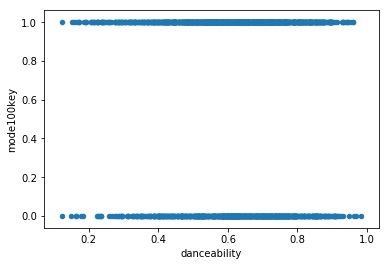

In [3]:
sptdata['mode100key'] = sptdata['mode']*100 + sptdata['key']
sptdata['mode100key'] = np.where(sptdata.mode100key >= sptdata['mode100key'].mean(), 1, 0)
sptdata.plot(kind = "scatter", x = "danceability", y = "mode100key")

## **Part 2:** Predicting a Categorical Response

In [4]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = sptdata[feature_cols]
y = sptdata.mode100key
logreg.fit(X, y)
sptdata['mode100key_pred_class'] = logreg.predict(X)

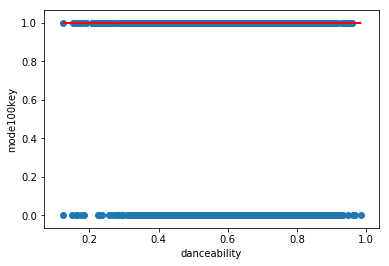

In [5]:
plt.scatter(sptdata.danceability, sptdata.mode100key)
plt.plot(sptdata.danceability, sptdata.mode100key_pred_class, color='red')
plt.xlabel('danceability')
plt.ylabel('mode100key')